In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

(480, 480)


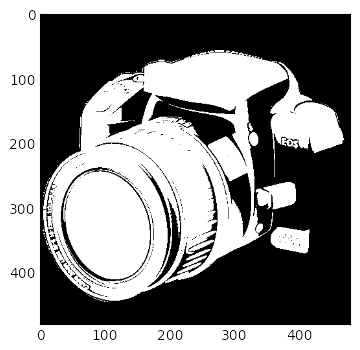

In [248]:
filename = '/Users/munsellb/camera.png'
I = cv2.imread( filename )
G = I[:,:,1] #cv2.cvtColor( I, cv2.COLOR_RGB2GRAY )
X = np.zeros( G.shape )
X = cv2.GaussianBlur(G, (5,5), 0.5 )
#B = cv2.Laplacian( X, cv2.CV_64F )
#B = cv2.Sobel( X, cv2.CV_64F, 1, 1, ksize=3 )

[ret, B] = cv2.threshold( X, 25, 255, cv2.THRESH_BINARY )

print B.shape

plt.imshow( B, cmap='gray')

137.778350515


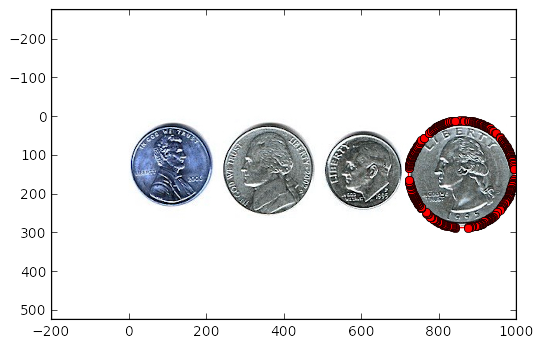

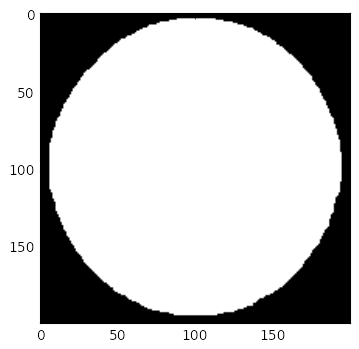

In [2]:
filename = '/Users/munsellb/coins2.jpeg'
I = cv2.imread( filename )

plt.figure()
plt.imshow( I )
G = cv2.cvtColor( I, cv2.COLOR_RGB2GRAY )

S = np.zeros( (200,200) )
B = cv2.GaussianBlur( G,(25,25),2.5)
[ret, thresh] = cv2.threshold( B, 240, 255, cv2.THRESH_BINARY )

#plt.imshow( thresh , cmap='gray')

contours,h = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE )

L=contours[4][:,0]

#print L

Xc = L[:,1] - np.mean( L[:,1] )
Yc = L[:,0] - np.mean( L[:,0] )
      
x_max = np.absolute( np.amax( Xc ) )
y_max = np.absolute( np.amax( Yc ) )
      
d_max = x_max;
      
if y_max > d_max:
     d_max = y_max
        
print d_max

X = Xc*(d_max/200) + 100
Y = Yc*(d_max/200) + 100
      
#X = (Xc/d_max)*(200/5) + 100   
#Y = (Yc/d_max)*(200/5) + 100 
     
# print L[:,0]
plt.plot( L[:,0], L[:,1], 'ro-')
plt.axis( 'equal' )
plt.show();

O = np.matrix([Y,X]).transpose(1,0)
cv2.drawContours(S, [O.astype(int)], -1, 255, -1 )

plt.figure()
plt.imshow( S, cmap='gray')


### Gradient assignment

The Laplacian $\nabla f = \frac{\partial f}{\partial x} + \frac{\partial f}{\partial y }$ performs a partial first-order derivative in both the x-direction $\frac{\partial f}{\partial x}$ and the y-direction $\frac{\partial f}{\partial y}$ where $f(x,y)$ is a function that represents the image we are operating on. In discrete notation the partial first-order derivates are found using:

$$G_x = \frac{\partial f}{\partial x} = f(x+1,y) - f(x-1,y)$$

and

$$G_y = \frac{\partial f}{\partial y } = f(x,y+1) - f(x,y-1)$$

We can then find the magnitude of the gradient

$$| \nabla f(x,y) | = \sqrt{ G_x^2 + G_y^2 }$$

and the angle of the gradient

$$ \Theta = tan^{-1} \frac{G_y}{G_x} $$.

The $3 \times 1$ kernel matrix for $G_x$ is

<table width="5%">
    <tr>
      <td><center>-1</center></td>
    </tr>
    <tr>
      <td><center>0</center></td>
    </tr>
    <tr>
      <td><center>1</center></td>
    </tr>
</table>

and the $1 \times 3$ kernel matrix for $G_y$ is

<table width="15%">
    <tr>
      <td><center>-1</center></td>
      <td><center>0</center></td>
      <td><center>1</center></td>
    </tr>
</table>

**Q1**. [*All Students*] Using Python and the OpenCV library, write a small program that applies the gradient kernel matrices (defined above) to the "ghand.png" image. Your program shall create a new *gradient magnitude* image that only defines the contour of the hand. All other edge information should not be included. Note: you may use thresholding and smoothing operations provided by the OpenCV library (i.e. you don't need to write your own program to perform this operation) to help solve this question. 

**Q2**. [*All Students*] Using Python and the OpenCV library, write a small program that applies the gradient kernel matrices (defined above) to the "ghand.png" image. Your program shall create a new *gradient angle* image that only defines the contour of the hand. All other edge information should not be included. Note: you may use the gradient magnitude image found in Q1 above to help solve this question. 

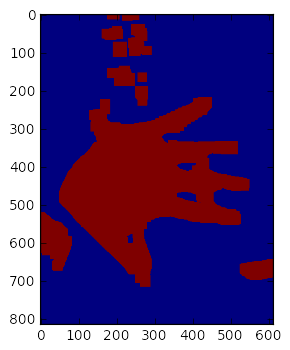

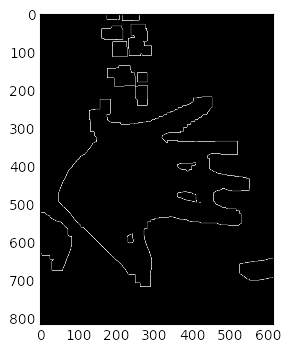

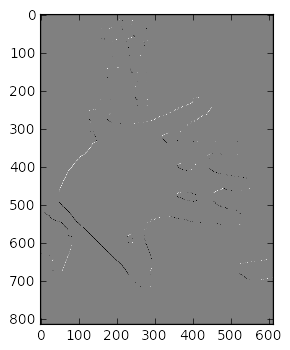

In [5]:
filename = '/Users/munsellb/ghand.png'
I = cv2.imread( filename )

G = cv2.cvtColor( I, cv2.COLOR_RGB2GRAY )
G = cv2.equalizeHist( G )
G = cv2.GaussianBlur( G, (5,5), 45.0 )

# create an empty magnitude (M) and
# angle (A) image that has the same
# resolution as image G
M = np.zeros( G.shape )
A = np.zeros( G.shape )

# two level threshold (60 to 150)
# anything >= 60 set to 255, else set to 0
# anythong <= 150 set to 255, else set to 0
[ret, thresh1] = cv2.threshold( G, 60, 255, cv2.THRESH_BINARY )
[ret, thresh2] = cv2.threshold( G, 150, 255, cv2.THRESH_BINARY_INV )
thresh = np.multiply( thresh1, thresh2 )

# morphological operation, i.e. fill in black pix 
# values that are surrounded by a neighborhood of 
# white pix values
kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (25,25) )
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.figure()
plt.imshow( thresh )

m,n = thresh.shape

for i in xrange(0, m-1):
        
    # few ternary operators to check index 
    # out-of-bounds conditions, e.g. I[-1,:]
    dy = i if i+1 > m-1 else i+1
    ddy = 0 if i-1 < 0 else i-1
            
    for j in xrange(0, n-1):
        
        # few ternary operators to check index 
        # out-of-bounds conditions, e.g. I[:,-1]
        dx = j if j+1 > n-1 else j+1
        ddx = 0 if j-1 < 0 else j-1
        
        # compute the gradients in both dimensions
        # using 1x3 or 3x1 kernel matrix values
        Gy = np.float_( thresh[dy,j] ) - np.float_( thresh[ddy,j] )
        Gx = np.float_( thresh[i,dx] ) - np.float_( thresh[i,ddx] )
            
        # compute gradient magnitude
        M[i,j] = np.sqrt( np.power(Gx,2) + np.power(Gy,2) )
        # compute gradient angle
        A[i,j] = 0 if Gx == 0 else np.arctan( Gy / Gx )
  

# display gradient magnitude image
plt.figure()
plt.imshow( M, cmap='gray')

# display gradient angle image
plt.figure()
plt.imshow( A, cmap='gray')

### Laplacian assignment

The Laplacian $\nabla^2 f = \frac{\partial^2f}{\partial x^2} + \frac{\partial^2f}{\partial y^2}$ performs a partial second-order derivative in both the x-direction $\frac{\partial^2f}{\partial x^2}$ and the y-direction $\frac{\partial^2f}{\partial y^2}$ where $f(x,y)$ is a function that represents the image we are operating on. In discrete notation the partial second-order derivates are found using:

$$\frac{\partial^2f}{\partial x^2} = f(x+1,y) + f(x-1,y) - 2f(x,y)$$
and
$$\frac{\partial^2f}{\partial y^2} = f(x,y+1) + f(x,y-1) - 2f(x,y)$$

In general, we combine these two second order derivatives

$$\nabla^2 f(x,y) = f(x+1,y) + f(x-1,y) + f(x,y+1) + f(x,y-1) - 4f(x,y)$$

into one $3 \times 3$ kernel matrix

<table width="25%">
    <tr>
      <td><center>0</center></td>
      <td><center>1</center></td>
      <td><center>0</center></td>
    </tr>
    <tr>
      <td><center>1</center></td>
      <td><center>-4</center></td>
      <td><center>1</center></td>
    </tr>
    <tr>
      <td><center>0</center></td>
      <td><center>1</center></td>
      <td><center>0</center></td>
    </tr>
</table>

**Q1**. [*MUSC Graduate Students*] Why do we combine the two partial second-order derivatives into one $3 \times 3$ Laplacian kernel matrix? That is, why don't we perform a x-direction ( $3 \times 3$ kernel matrix) and y-direction ($3 \times 3$ kernel matrix) computation, i.e. like gradient above, to find the magnitude and direction of the edge?

**Q2**. [*All Students*] Using Python and the OpenCV library, write a small program that applies the Laplacian kernel matrix (defined above) to the "hand.png" image. Your program shall create a new edge image that only defines the contour of the hand. All other edge information should not be included. Note: you may use thresholding and smoothing operations provided by the OpenCV library (i.e. you don't need to write your own program to perform this operation) to help solve this question. 


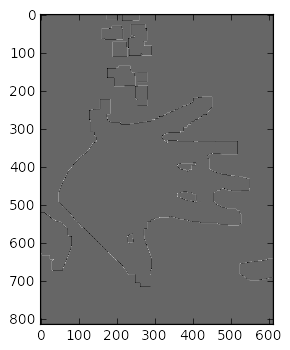

In [69]:
filename = '/Users/munsellb/ghand.png'
I = cv2.imread( filename )

G = cv2.cvtColor( I, cv2.COLOR_RGB2GRAY )
G = cv2.equalizeHist( G )
G = cv2.GaussianBlur( G, (5,5), 45.0 )

# create an empty edge image (E)
# with the same resolution as G
E = np.zeros( G.shape )


# two level threshold (60 to 150)
# anything >= 60 set to 255, else set to 0
# anythong <= 150 set to 255, else set to 0
[ret, thresh1] = cv2.threshold( G, 60, 255, cv2.THRESH_BINARY )
[ret, thresh2] = cv2.threshold( G, 150, 255, cv2.THRESH_BINARY_INV )
thresh = np.multiply( thresh1, thresh2 )

# morphological operation, i.e. fill in black pix 
# values that are surrounded by a neighborhood of 
# white pix values
kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (25,25) )
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

m,n = thresh.shape

for i in xrange(0, m-1):
        
    # few ternary operators to check index 
    # out-of-bounds conditions, e.g. I[-1,:]
    dy = i if i+1 > m-1 else i+1
    ddy = 0 if i-1 < 0 else i-1
            
    for j in xrange(0, n-1):
        
        # few ternary operators to check index 
        # out-of-bounds conditions, e.g. I[:,-1]
        dx = j if j+1 > n-1 else j+1
        ddx = 0 if j-1 < 0 else j-1
            
        # compute 2nd order derivative using
        # 3x3 kernel matrix values
        E[i,j] = thresh[i,dx] + thresh[i,ddx] + thresh[dy,j] + thresh[ddy,j] - (4*thresh[i,j])

# opencv Laplacian function, should give the
# same results (uncomment to compare)
#S = cv2.Laplacian( thresh, cv2.CV_64F )   

plt.imshow( E, cmap='gray')

### Shape matching assignment

The templates.zip file includes nine $200 \times 200$ black and white *template* images
that define the following $2$D shapes:
1. apple
2. cup
3. face
4. hat
5. horseshoe
6. key
7. pentagon
8. star
9. triangle

where white pixels represent the area inside the contour, and the black pixels
represent the area outside the contour.

The confusion_cv file is one black and white image that has all nine *target* 
shapes. Likewise, the white pixels represent the area inside the contours, 
and the black pixels represent the area outside the contours.

**Q1**. Using Python and the OpenCV library, write a small program that performs
the following steps for all nine target contours in the confusion_cv image.
1. Extract the target contour. May use the *findContours* opencv function.
2. Draw the scaled target contour in the center of a square resolution $200 \times 200$ 
black and white image (white pixels = area inside the contour and black pixels = area 
outside the contour). May use the *drawContours* opencv function.
3. Compute the Jaccard coefficient $J(A,B)=\frac{|A \cap B|}{|A \cup B|}$ between the target 
image $A$ and each of the nine template images $B$, where $|\cdot|$ is the number of pixels. 
Hint: to remove rotation difference iteratively apply rotation matrix and recompute Jaccard
coefficient.

Lastly, using python create a $9 \times 9$ similarity table that includes all the 
Jaccard calculations and display in notebook, where rows represent target shapes
and columns represent template shapes. For instance,
<table width="15%">
    <tr>
      <td><center>J(apple,apple)</center></td>
      <td><center>J(apple,cup)</center></td>
      <td><center>J(apple,face)</center></td>
      <td><center>J(apple,hat)</center></td>
      <td><center>J(apple,horseshoe)</center></td>
      <td><center>J(apple,key)</center></td>
      <td><center>J(apple,pentagon)</center></td>
      <td><center>J(apple,star)</center></td>
      <td><center>J(apple,triangle)</center></td>
    </tr>
    <tr>
      <td><center>J(cup,apple)</center></td>
      <td><center>J(cup,cup)</center></td>
      <td><center>J(cup,face)</center></td>
      <td><center>J(cup,hat)</center></td>
      <td><center>J(cup,horseshoe)</center></td>
      <td><center>J(cup,key)</center></td>
      <td><center>J(cup,pentagon)</center></td>
      <td><center>J(cup,star)</center></td>
      <td><center>J(cup,triangle)</center></td>
    </tr>
    <tr>
      <td><center>J(face,apple)</center></td>
      <td><center>J(face,cup)</center></td>
      <td><center>J(face,face)</center></td>
      <td><center>J(face,hat)</center></td>
      <td><center>J(face,horseshoe)</center></td>
      <td><center>J(face,key)</center></td>
      <td><center>J(face,pentagon)</center></td>
      <td><center>J(face,star)</center></td>
      <td><center>J(face,triangle)</center></td>
    </tr>
    <tr>
      <td><center>J(hat,apple)</center></td>
      <td><center>J(hat,cup)</center></td>
      <td><center>J(hat,face)</center></td>
      <td><center>J(hat,hat)</center></td>
      <td><center>J(hat,horseshoe)</center></td>
      <td><center>J(hat,key)</center></td>
      <td><center>J(hat,pentagon)</center></td>
      <td><center>J(hat,star)</center></td>
      <td><center>J(hat,triangle)</center></td>
    </tr>
    <tr>
      <td><center>J(horseshoe,apple)</center></td>
      <td><center>J(horseshoe,cup)</center></td>
      <td><center>J(horseshoe,face)</center></td>
      <td><center>J(horseshoe,hat)</center></td>
      <td><center>J(horseshoe,horseshoe)</center></td>
      <td><center>J(horseshoe,key)</center></td>
      <td><center>J(horseshoe,pentagon)</center></td>
      <td><center>J(horseshoe,star)</center></td>
      <td><center>J(horseshoe,triangle)</center></td>
    </tr>
    <tr>
      <td><center>J(key,apple)</center></td>
      <td><center>J(key,cup)</center></td>
      <td><center>J(key,face)</center></td>
      <td><center>J(key,hat)</center></td>
      <td><center>J(key,horseshoe)</center></td>
      <td><center>J(key,key)</center></td>
      <td><center>J(key,pentagon)</center></td>
      <td><center>J(key,star)</center></td>
      <td><center>J(key,triangle)</center></td>
    </tr>
    
    <tr>
      <td><center>J(pentagon,apple)</center></td>
      <td><center>J(pentagon,cup)</center></td>
      <td><center>J(pentagon,face)</center></td>
      <td><center>J(pentagon,hat)</center></td>
      <td><center>J(pentagon,horseshoe)</center></td>
      <td><center>J(pentagon,key)</center></td>
      <td><center>J(pentagon,pentagon)</center></td>
      <td><center>J(pentagon,star)</center></td>
      <td><center>J(pentagon,triangle)</center></td>
    </tr>
    <tr>
      <td><center>J(star,apple)</center></td>
      <td><center>J(star,cup)</center></td>
      <td><center>J(star,face)</center></td>
      <td><center>J(star,hat)</center></td>
      <td><center>J(star,horseshoe)</center></td>
      <td><center>J(star,key)</center></td>
      <td><center>J(star,pentagon)</center></td>
      <td><center>J(star,star)</center></td>
      <td><center>J(star,triangle)</center></td>
    </tr>
    <tr>
      <td><center>J(triangle,apple)</center></td>
      <td><center>J(triangle,cup)</center></td>
      <td><center>J(triangle,face)</center></td>
      <td><center>J(triangle,hat)</center></td>
      <td><center>J(triangle,horseshoe)</center></td>
      <td><center>J(triangle,key)</center></td>
      <td><center>J(triangle,pentagon)</center></td>
      <td><center>J(triangle,star)</center></td>
      <td><center>J(triangle,triangle)</center></td>
    </tr>
</table>






In [166]:
def getBinaryImage( C, d, theta ):
    
    debug = False
    
    # --------------------------------------
    # Create some matrices filled with zero
    S = np.matrix( [[0,0],[0,0]] ) # empty scaling matrix
    B = np.zeros( d ) # binary image w/resolution d
    R = np.matrix( [[0,0],[0,0]] ) # empty rotation matrix
    
    # ---------------------------------------
    # Compute the rotation matrix. Remember to
    # convert from degrees to radians
    R[0,0] = np.cos( -theta * (np.pi/180) )
    R[1,0] = np.sin( -theta * (np.pi/180) )
    R[0,1] = -R[1,0]
    R[1,1] = R[0,0]
    
    # ---------------------------------------
    # Translate contour to origin (i.e. remove
    # mean value). Use opencv moments function
    # center of mass calculation more accurate
    # than computing mean.
    
    M = cv2.moments(C) 
    
    C = C[:,0]
    
    Xc = C[:,1] - M['m01']/M['m00'] #np.mean( C[:,1] )
    Yc = C[:,0] - M['m10']/M['m00'] #np.mean( C[:,0] )
    
    if debug:
        plt.figure()
        plt.plot( Yc, Xc, 'b-')
        plt.axis( 'equal' )
        plt.show();
    
    # ---------------------------------------
    # Compute the maximum value in the x-coord
    # or the y-coord.
    x_max = np.absolute( np.amax( Xc ) )
    y_max = np.absolute( np.amax( Yc ) )
    
    d_max = y_max if y_max > x_max else x_max
    
    # ---------------------------------------
    # Create a set of normalized points by 
    # dividing by the d_max value, the values 
    # in P will be in [-1 1]
    P = np.matrix([Yc,Xc])/d_max
    
    if debug:
        plt.figure()
        plt.plot( P[0,:].transpose(1,0), P[1,:].transpose(1,0), 'g-')
        plt.axis( 'equal' )
        plt.show();
    
    # ---------------------------------------
    # Compute scaling, want to make roughly as
    # big as template (3.0 would be a free 
    # paramter used to improve similarity 
    # accuracy
    S[0,0] = d[0]/3.0
    S[1,1] = S[0,0]
    
    # ---------------------------------------
    # Perform rigid transformation 
    O = R*S*P + d[0]/2
 
    if debug:
        plt.figure()
        plt.plot( O[0,:].transpose(1,0), O[1,:].transpose(1,0), 'r-')
        plt.axis( 'equal' )
        plt.show();
    
    # ---------------------------------------
    # draw scaled, rotated, and translated 
    # shape in 200 x 200 binary image
    O = O.transpose(1,0)
    cv2.drawContours(B, [O.astype(int)], -1, 1, -1 )
    
    if debug:
        plt.figure()
        plt.imshow( B, cmap='gray' )
    
    return B

In [169]:
def jaccard( A, B ):
    
    debug = False
    
    I = np.multiply( A, B )
    U = ( A + B ) - I
    
    if debug:
        plt.figure()
        plt.imshow( I )
        plt.figure()
        plt.imshow( U )
    
    return np.float_( np.sum( I ) )/np.float_( np.sum( U ) )

number of contours = 9
[[72 72 60 53 34 24 72 43 50]
 [61 61 53 48 30 26 65 42 48]
 [50 50 94 65 17 36 57 48 63]
 [43 44 74 73 14 38 50 48 62]
 [41 36 20 14 64  3 38 16 12]
 [24 25 48 37 10 56 29 34 37]
 [79 77 59 51 34 22 86 44 50]
 [34 35 45 50 11 35 39 85 52]
 [44 46 64 67 11 39 51 54 90]]


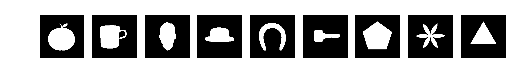

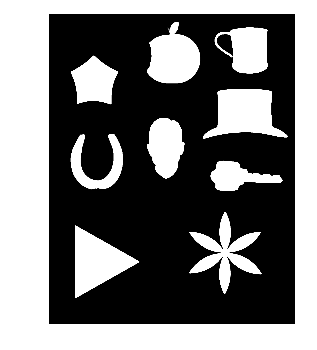

In [172]:
tshape_names = ['apple', 'cup', 'face', 'hat', 'horseshoe', 'key', 'pentagon', 'star', 'triangle']
T=list()

fig = plt.figure()
for i in xrange( 0, len( tshape_names) ):
    fhnd = '/Users/munsellb/gitbox/ComputerVision/templates/' + tshape_names[i] + '.png'
    T.append( cv2.imread( fhnd )[:,:,2]/255 )
    fig.add_subplot(1,len( tshape_names ), i+1 )
    plt.imshow( T[i], cmap='gray' )
    plt.axis( 'off' )

S = cv2.imread( '/Users/munsellb/gitbox/ComputerVision/confusion_cv.png' )
kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (9,9) )
S = cv2.morphologyEx(S, cv2.MORPH_OPEN, kernel)
S = cv2.medianBlur( S, 9 )

plt.figure()
plt.imshow( S )
plt.axis( 'off' )

contours,h = cv2.findContours( cv2.cvtColor( S, cv2.COLOR_RGB2GRAY ), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE )

# create a sorted contour list
# makes looking at the similarity
# table much much easier :)
sorted_contours = list()
sorted_contours.append( contours[9] ) # apple
sorted_contours.append( contours[7] ) # cup
sorted_contours.append( contours[4] ) # face
sorted_contours.append( contours[5] ) # hat
sorted_contours.append( contours[3] ) # horseshoe
sorted_contours.append( contours[2] ) # key
sorted_contours.append( contours[6] ) # pentagon
sorted_contours.append( contours[1] ) # star
sorted_contours.append( contours[0] ) # triangle

J = np.zeros( ( len(tshape_names), len( sorted_contours ) )  )
             
print 'number of contours = ' + str( len( sorted_contours ) )

for i in xrange( 0, len( tshape_names ) ):
    A = T[i]
    for j in xrange( 0, len( sorted_contours ) ):
        C = sorted_contours[j]
        for theta in range(0,120):
            B = getBinaryImage(C, A.shape, theta*3 )
            jc = jaccard( A, B )
            if J[i,j] < jc: J[i,j] = jc

print np.matrix( np.uint8( J*100 ) )


### Face detection project

The utrecht.zip file includes 139 color face images (49 men, 20 women), for more information see Utrecht ECVP in this url http://pics.stir.ac.uk/2D_face_sets.htm

Your job is to identify the eyes and then put a box around the face. You may choose any face image in the data set to develop your face detection algorithm with, however your python code should work for any face image included in the provided data set. 

CofC students: I will setup a dropbox for you to submit a python notebook. MUSC students: I'll get in touch with Thomas and have you submit your python notebook to him (or his postdoc). The due date for this project is March 17, 2017.

This project will test your: 1) python coding capability, 2) knowledge of opencv library, 3) problem solving capabilities, and 4) creativity.

Have fun with this project, it really is a nice problem that has a ton of application!


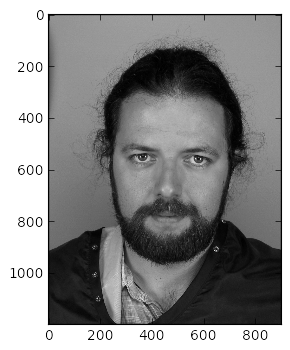

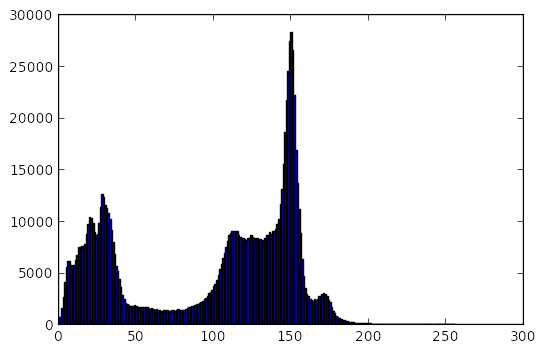

In [265]:
#F = cv2.imread( '/Users/munsellb/gitbox/ComputerVision/fdb/m4001.jpg' )
#F = cv2.imread( '/Users/munsellb/gitbox/ComputerVision/fdb/f4030s.jpg' )
#F = cv2.imread( '/Users/munsellb/gitbox/ComputerVision/fdb/m4068.jpg' )
#F = cv2.imread( '/Users/munsellb/gitbox/ComputerVision/fdb/m4062s.jpg' )
#F = cv2.imread( '/Users/munsellb/gitbox/ComputerVision/fdb/f4007_1.jpg' )
F = cv2.imread( '/Users/munsellb/gitbox/ComputerVision/fdb/m4002.jpg' )

G = cv2.cvtColor( F, cv2.COLOR_RGB2GRAY )
#G = cv2.medianBlur( G, 25 )

plt.figure()
plt.imshow(G, cmap='gray')
plt.figure()
plt.hist( G.ravel(), 256, [0,256] )
plt.show()
